In [409]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.tree import  DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# decision Tree
- 

In [243]:
df = pd.read_csv('Cases/Wisconsin/BreastCancer.csv')
# df.head()

In [4]:
y= df['Class']
X= df.drop('Class',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 24, test_size=0.3, stratify= y)

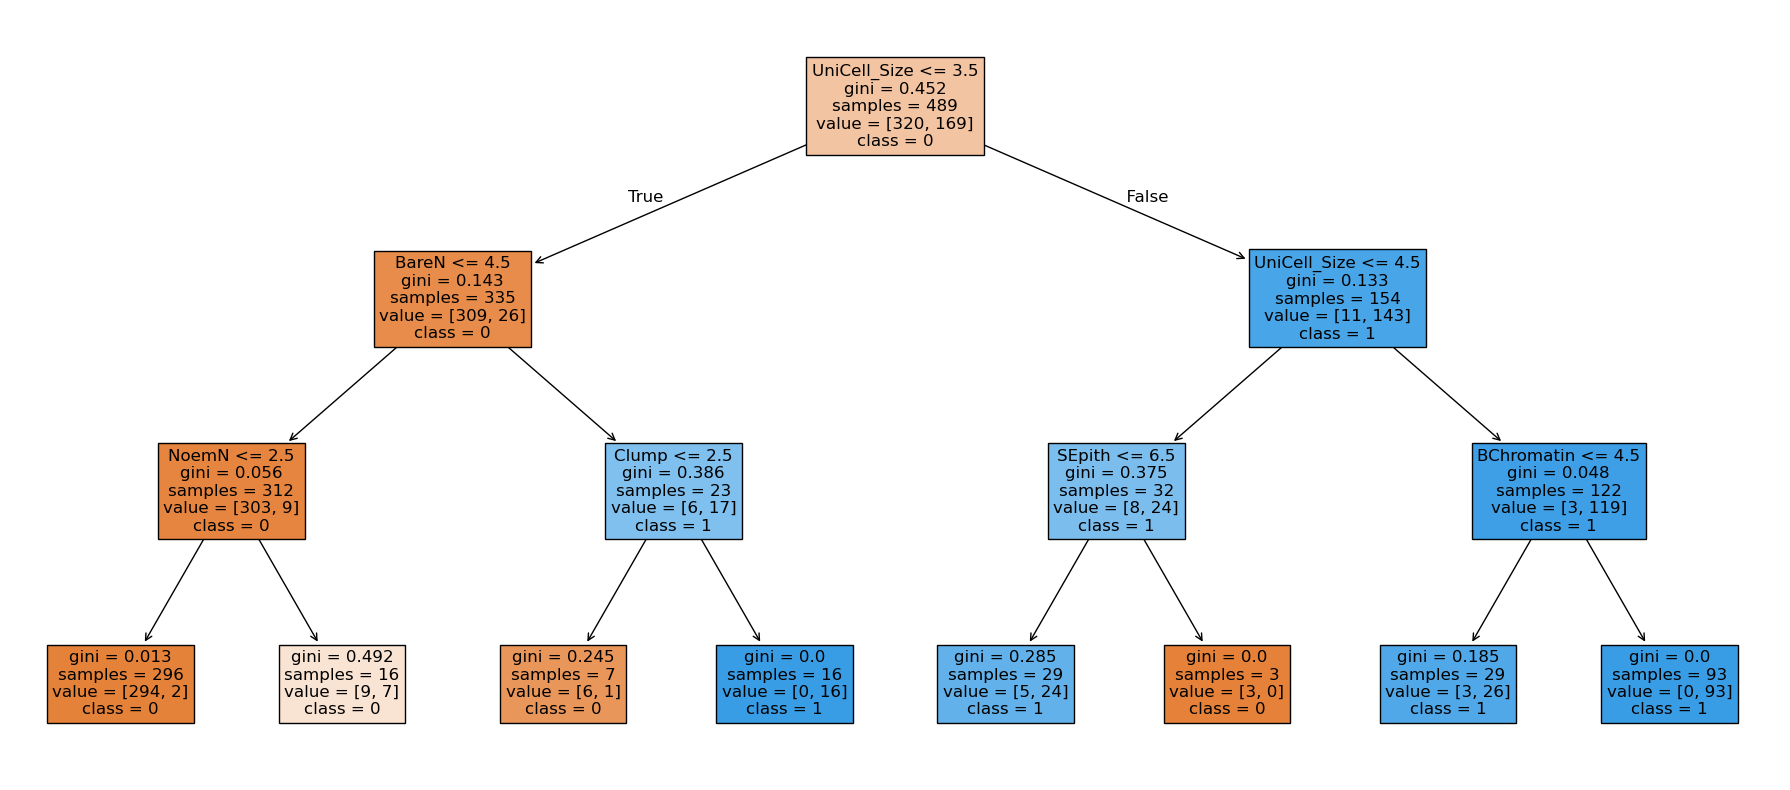

In [5]:
dtc= DecisionTreeClassifier(random_state=24, max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(18,8))
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9523809523809523

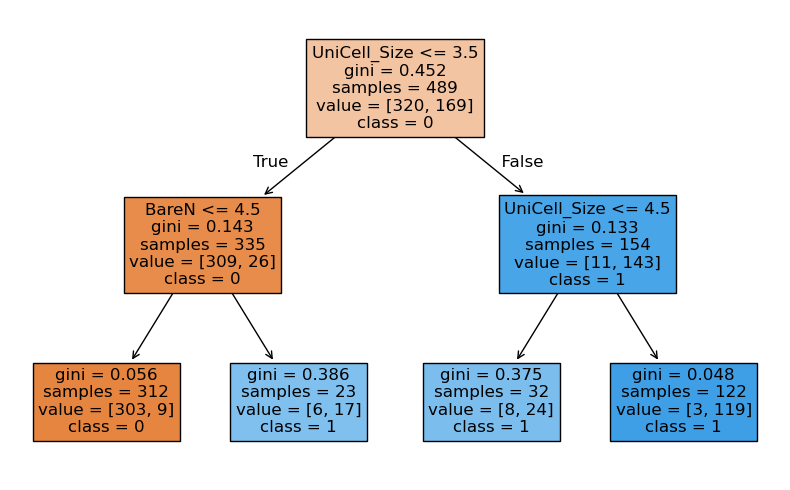

In [7]:
dtc= DecisionTreeClassifier(random_state = 24, max_depth = 2)
dtc.fit(X_train, y_train)
plt.figure(figsize=(8,5))
plot_tree(dtc, feature_names= list(X.columns), class_names=['0','1'], filled= True, fontsize=12)
plt.tight_layout()
plt.show()

## using GCV

In [9]:
dtc = DecisionTreeClassifier(random_state = 24)
params = {'max_depth': [2,3,4,5,6,None]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'roc_auc')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='roc_auc')

In [10]:
gcv.best_params_

{'max_depth': 5}

In [11]:
gcv.best_score_

0.9607632219156177

In [17]:
y.unique().tolist()

['Benign', 'Malignant']

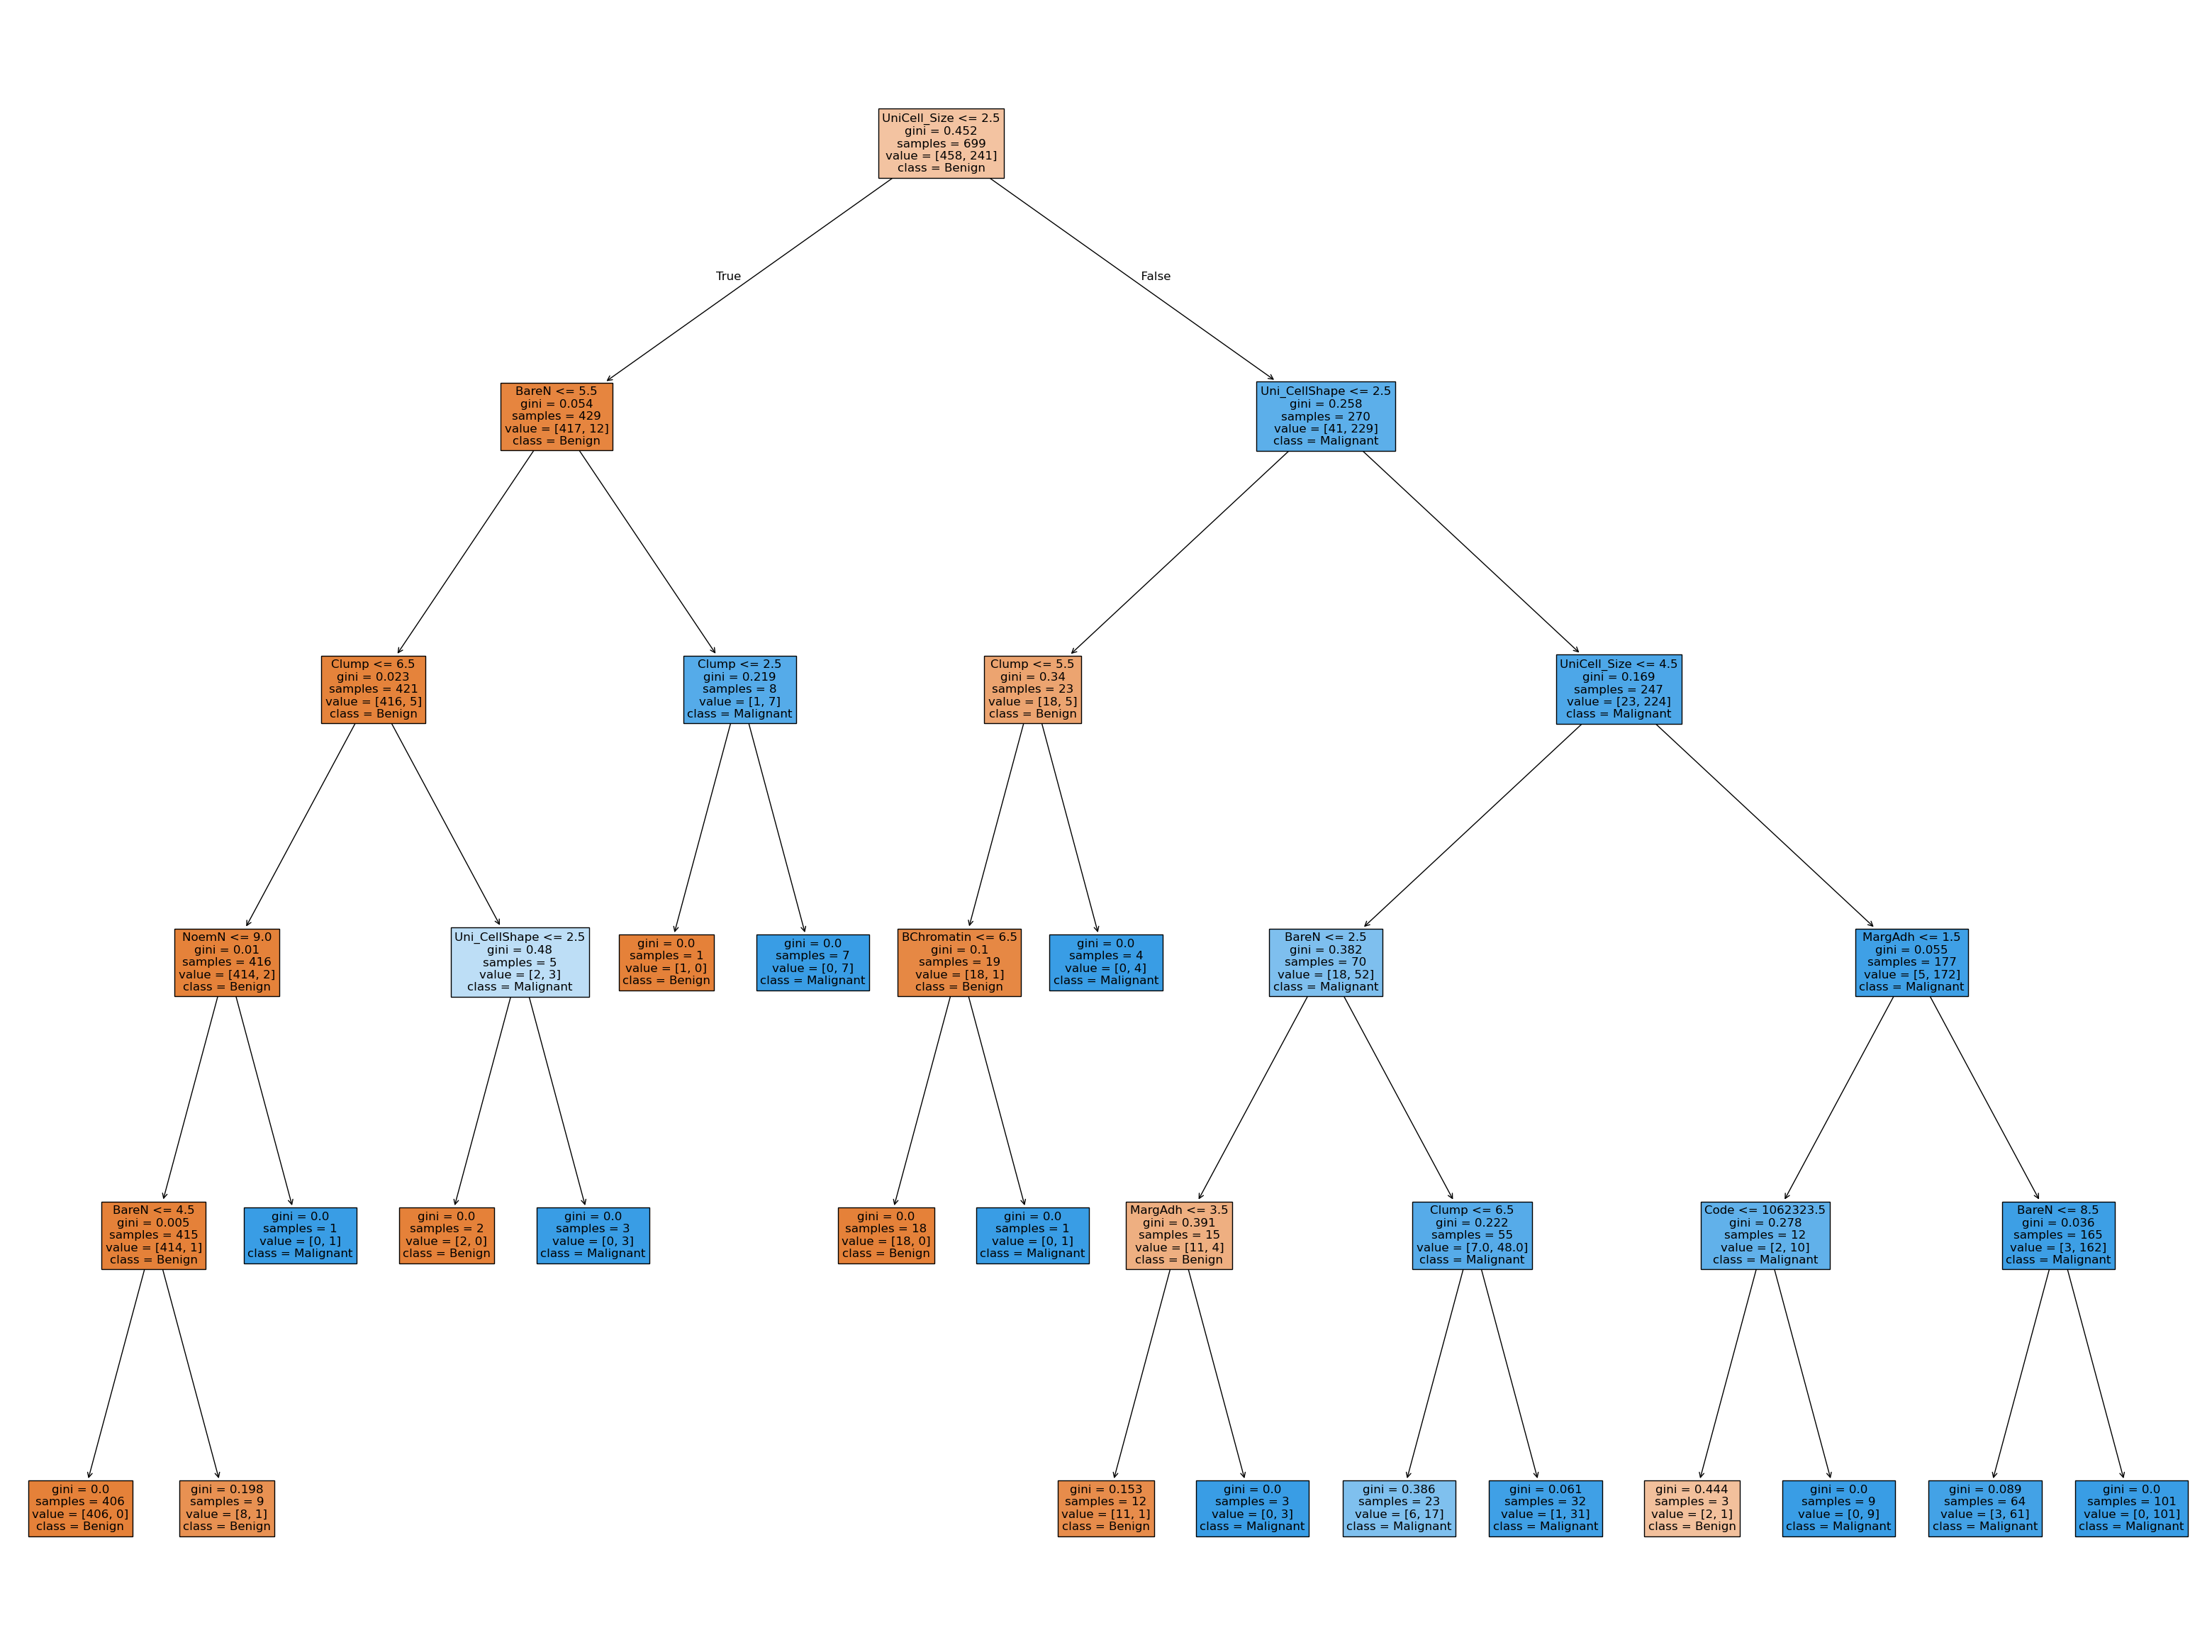

<Figure size 640x480 with 0 Axes>

In [19]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(40,30))
plot_tree(best_tree, feature_names= list(X.columns), class_names= y.unique().tolist(), filled= True, fontsize=12)
plt.show()
plt.tight_layout()

In [20]:
# not all variables of the Dataset used in tree and there are some variable which are used more than once
# we have to find how much a variable contributed to reducing the ginni index

In [23]:
X.columns

Index(['Code', 'Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith',
       'BareN', 'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

###  to see feature importance(ginin importance)
- **DT.feature_importance_**

In [26]:

print(X.columns)
best_tree.feature_importances_

Index(['Code', 'Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith',
       'BareN', 'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')


array([0.00679471, 0.04278266, 0.77526383, 0.07611931, 0.01537848,
       0.        , 0.07047816, 0.00643709, 0.00674575, 0.        ])

In [28]:
df = pd.DataFrame({'features' : X.columns.tolist(), 'importance' : best_tree.feature_importances_})
df

,features,importance
0,Code,0.006795
1,Clump,0.042783
2,UniCell_Size,0.775264
3,Uni_CellShape,0.076119
4,MargAdh,0.015378
5,SEpith,0.000000
6,BareN,0.070478
7,BChromatin,0.006437
8,NoemN,0.006746
9,Mitoses,0.000000


In [30]:
df.sort_values(by = 'importance', inplace = True)

<BarContainer object of 10 artists>

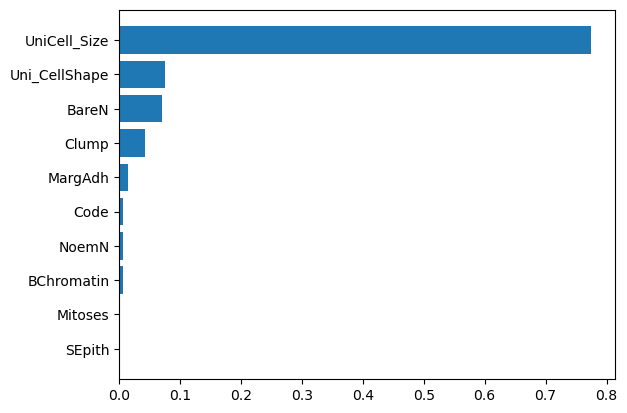

In [32]:
plt.barh(df.features, df.importance)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SEpith'),
  Text(1, 0, 'Mitoses'),
  Text(2, 0, 'BChromatin'),
  Text(3, 0, 'NoemN'),
  Text(4, 0, 'Code'),
  Text(5, 0, 'MargAdh'),
  Text(6, 0, 'Clump'),
  Text(7, 0, 'BareN'),
  Text(8, 0, 'Uni_CellShape'),
  Text(9, 0, 'UniCell_Size')])

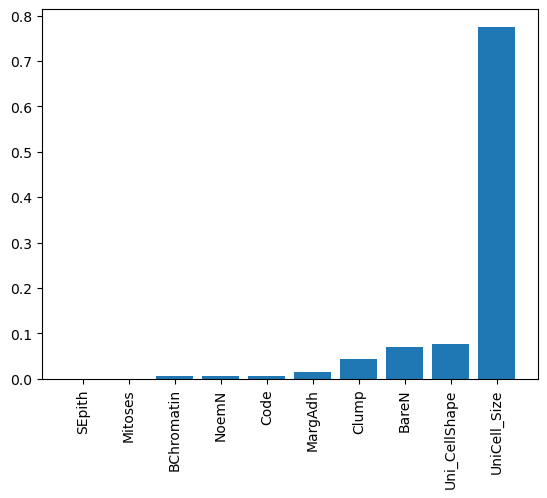

In [34]:
plt.bar(df.features, df.importance)
plt.xticks(rotation = 90)

## regularizatin parameters in DT
- max_depth
- min_sample_split
- min_sample_leaf

In [44]:
from sklearn.compose import make_column_transformer, make_column_selector

In [58]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [60]:
df = pd.read_csv('Cases/human-resources-analytics/HR_comma_sep.csv')
X = df.drop('left', axis = 1)
y = df.left

In [133]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
dt = DecisionTreeClassifier(random_state = 24)
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ohe, make_column_selector(dtype_include = object)), verbose_feature_names_out = False)
pipe = Pipeline([('CT', ct), ('DT', dt)])

In [135]:
params = {'DT__min_samples_split': [2, 10, 25, 50], 'DT__min_samples_leaf': [1, 10, 25, 50], 'DT__max_depth' : [None, 4, 6]}
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
gcv = GridSearchCV(pipe, param_grid = params, scoring = 'roc_auc', cv = kfold, verbose = 2)
gcv.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10; total time=   0.0s
[CV] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D12FA1BCB0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D12FA19940>)],
                                                          verbose_feature_names_out=False)),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=24))]),
             param_grid={'DT__max_depth': [None, 4, 6],
                         'DT__min_samples_leaf': [1, 10, 25, 50],
                         'DT__min_samples_split': [2, 10, 25, 50]},
             scoring='roc_auc', verbose=2)

In [136]:
print(gcv.best_score_, gcv.best_params_, sep = '\n')

0.9859959505714124
{'DT__max_depth': None, 'DT__min_samples_leaf': 10, 'DT__min_samples_split': 2}


In [137]:
best= gcv.best_estimator_

In [139]:
best.named_steps['DT'].feature_importances_ # we are accessing the key 'DT' of the output dictionary from the pipeline

array([5.20970813e-01, 1.45602793e-01, 1.06079455e-01, 7.34661254e-02,
       1.48698815e-01, 2.85011419e-04, 3.65999798e-05, 0.00000000e+00,
       8.83493499e-05, 1.10257499e-04, 1.74835740e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.97893379e-04, 1.22494686e-04,
       8.05381965e-04, 3.96940288e-04, 1.56552021e-03, 5.98715372e-04])

In [140]:
best.named_steps['CT'].get_feature_names_out()

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_support', 'Department_technical',
       'salary_high', 'salary_low', 'salary_medium'], dtype=object)

In [146]:
d = pd.DataFrame(data = {'features' : best.named_steps['CT'].get_feature_names_out(), 'importances': best.named_steps['DT'].feature_importances_})

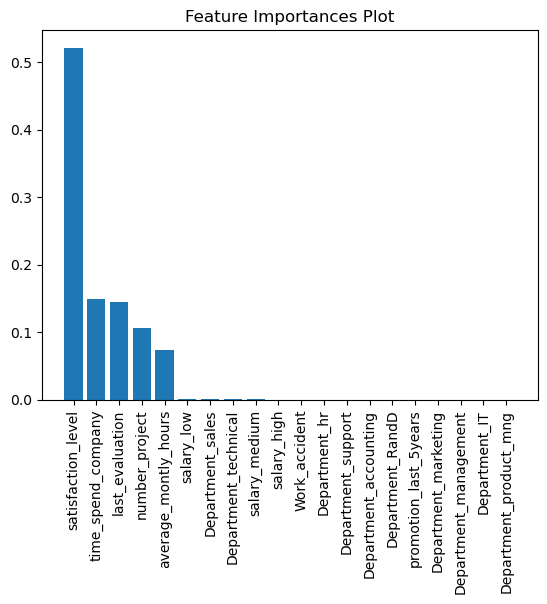

In [174]:
d.sort_values('importances', inplace = True, ascending= False)
plt.bar(d['features'],d['importances'])
plt.xticks(rotation =90)
plt.title('Feature Importances Plot')
plt.show()

<Axes: >

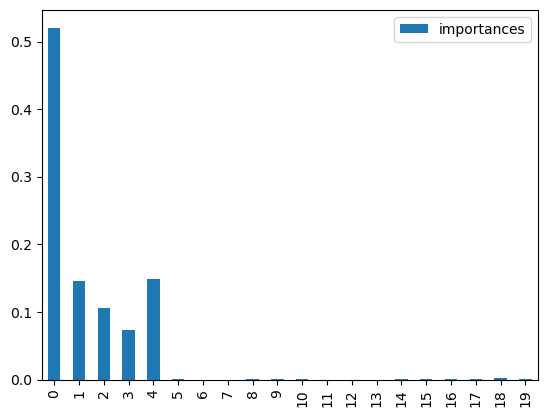

In [148]:
d.plot(kind = 'bar')

#### Satellite Dataset

In [185]:
sat = pd.read_csv('Cases/Satellite Imaging/Satellite.csv',sep=';')

In [187]:
sat.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,classes
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,grey soil


In [189]:
y= sat['classes']
X= sat.drop('classes', axis =1)

In [191]:
dtc= DecisionTreeClassifier(random_state=24)

In [199]:
params= {'min_samples_split':[2,10, 15, 50], 'min_samples_leaf': [1,10,25,50], 'max_depth':[None, 4, 6] }

gcv= GridSearchCV(dtc, param_grid = params,scoring= 'neg_log_loss', cv= kfold, verbose= 2)
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15; total time=   0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 15, 50]},
             scoring='neg_log_loss', verbose=2)

In [201]:
print(gcv.best_score_, gcv.best_params_, sep='\n')

-0.6679631827034694
{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}


In [205]:
best_tree= gcv.best_estimator_

In [213]:
best_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00242946, 0.35622852, 0.32804567, 0.        , 0.30031661,
       0.        , 0.00195442, 0.        , 0.00577412, 0.00067921,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00457201, 0.        , 0.        ,
       0.        ])

In [223]:
dsat= pd.DataFrame(data={'importances':best_tree.feature_importances_, 'names': X.columns.tolist() })
dsat.sort_values('importances', inplace = True)


<BarContainer object of 36 artists>

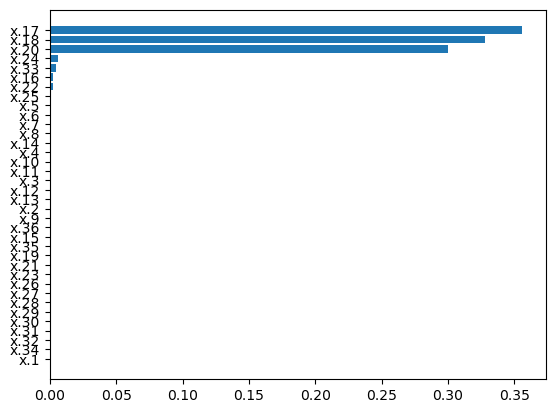

In [225]:
plt.barh(dsat['names'],dsat['importances'])


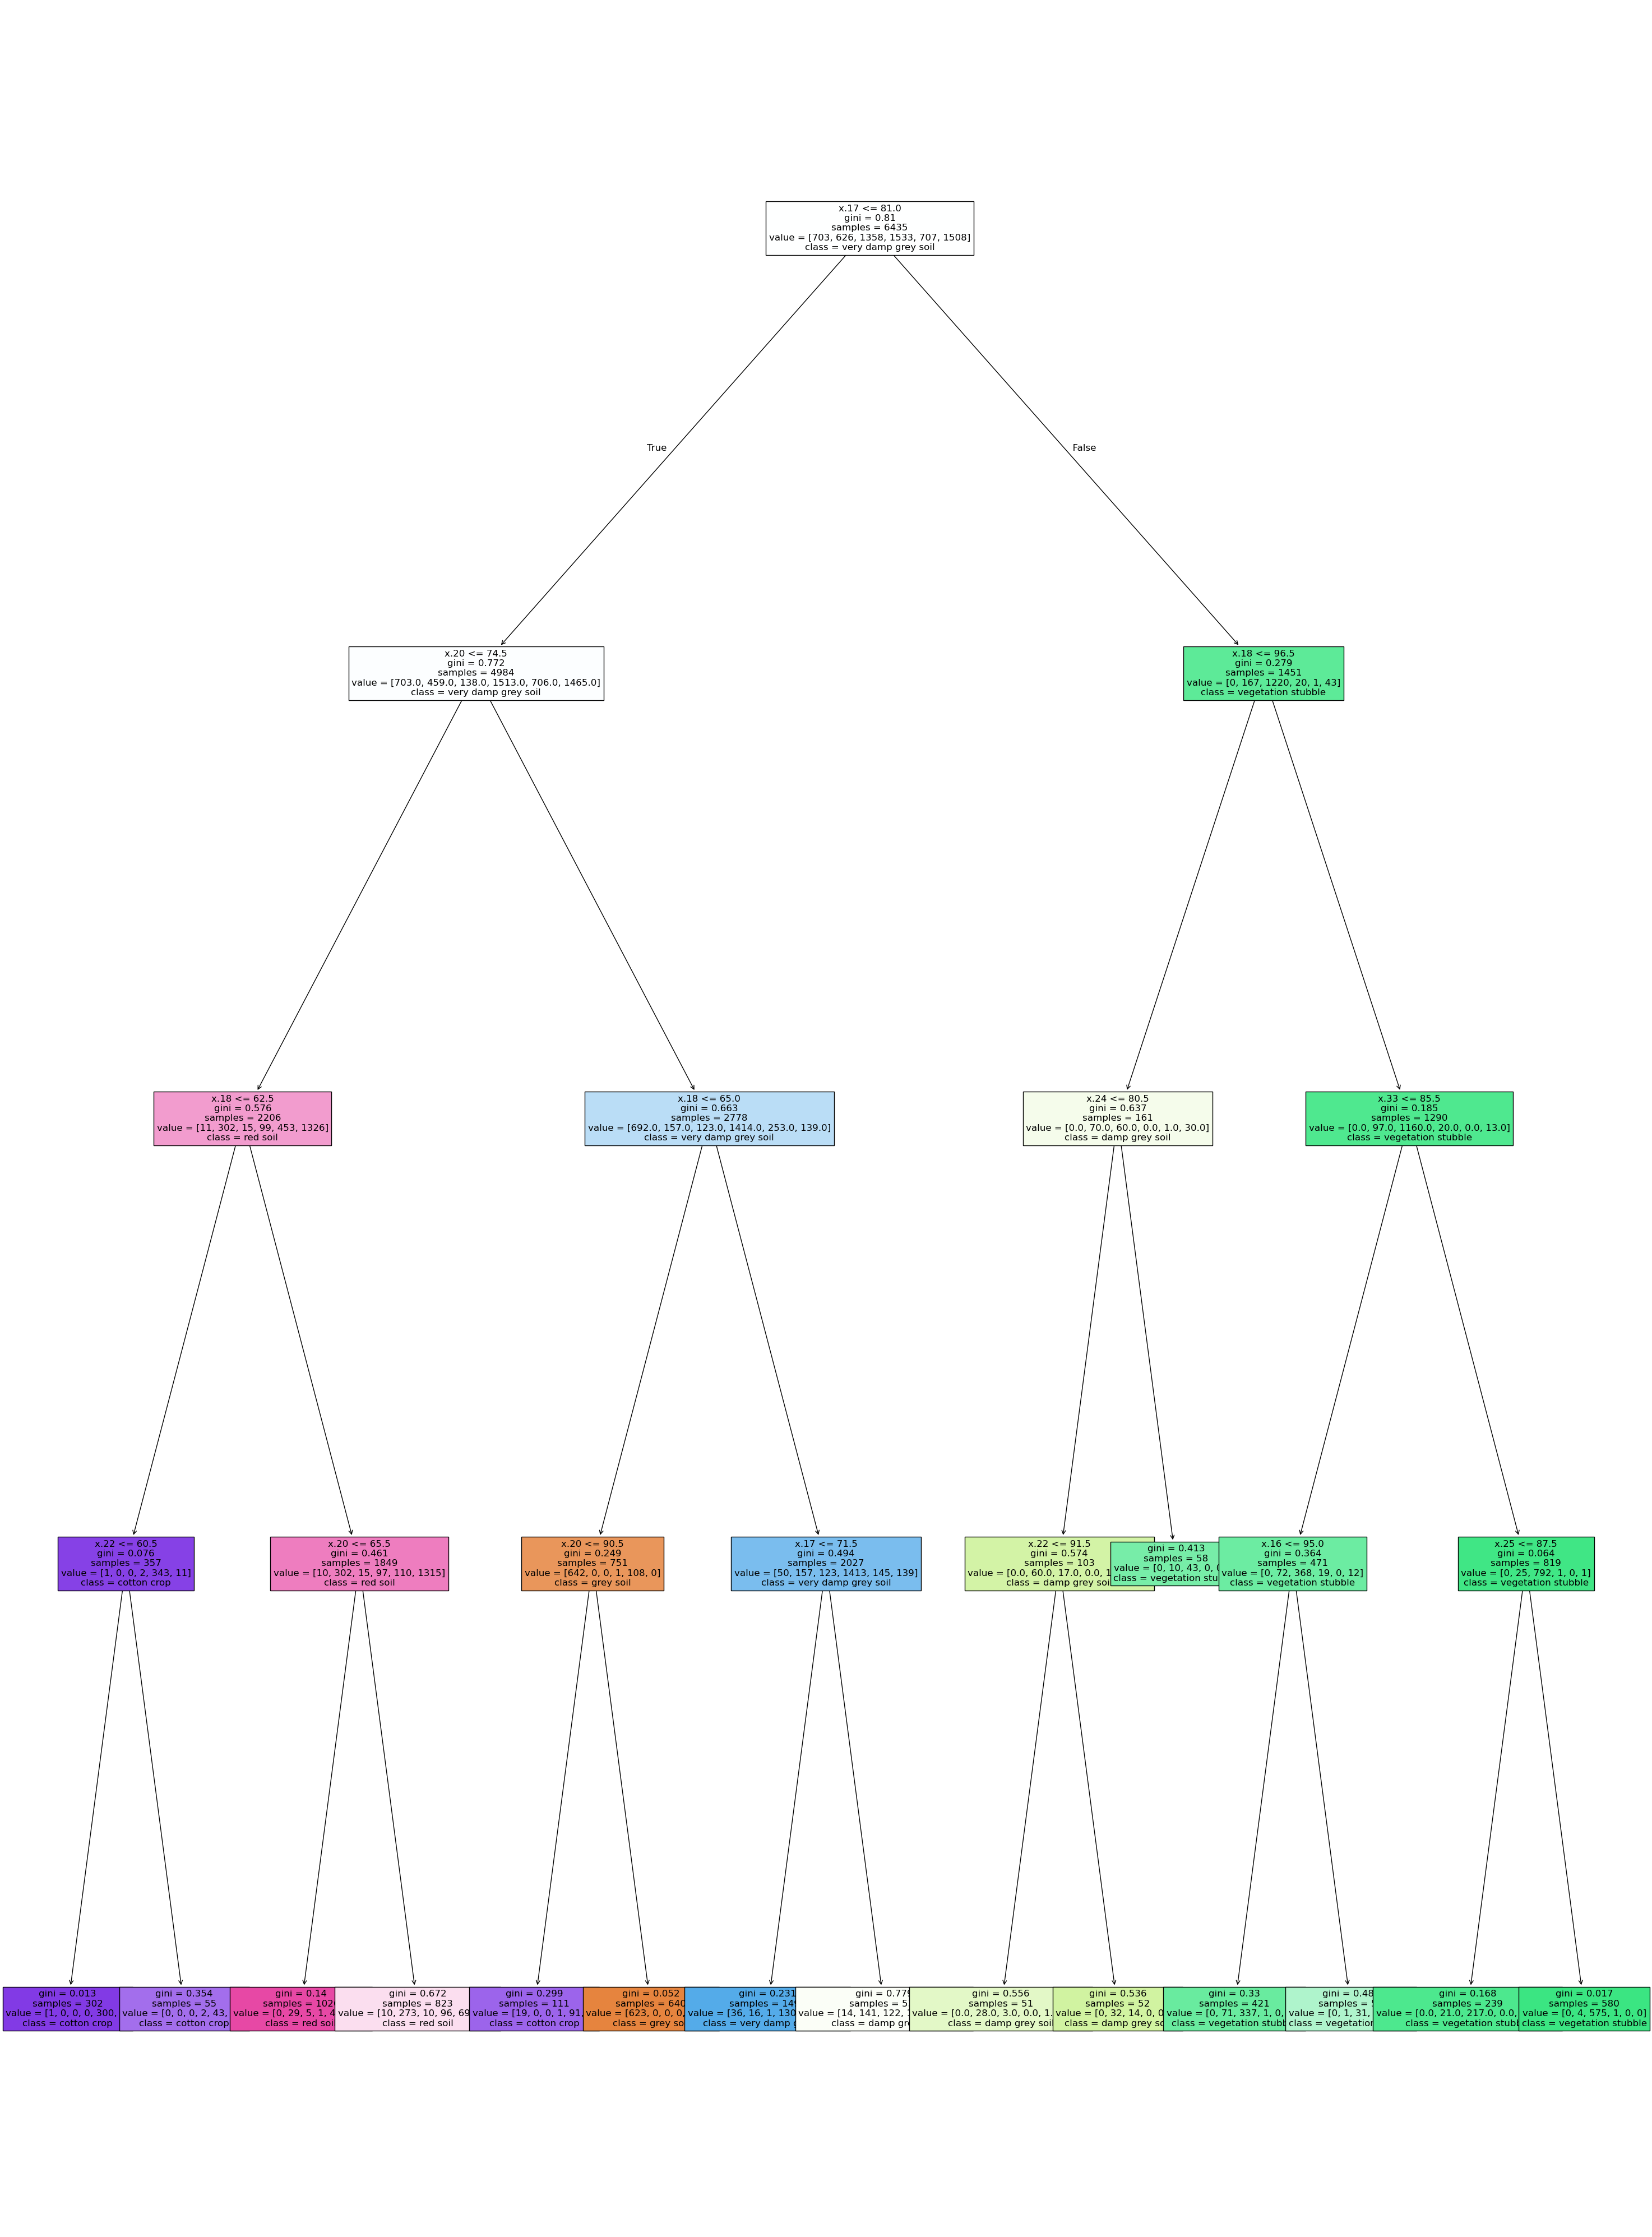

In [245]:
plt.figure(figsize=(30,40))
plot_tree(best_tree, feature_names= list(X.columns), class_names= y.unique().tolist(), filled= True, fontsize=12)
plt.tight_layout()
plt.show()

# decision Tree **regresser**

In [248]:
from sklearn.tree import DecisionTreeRegressor

In [250]:
con = pd.read_csv("Cases/Concrete Strength/Concrete_Data.csv")

In [254]:
X = con.drop('Strength', axis = 1)
y = con.Strength

In [256]:
dtr = DecisionTreeRegressor(random_state = 24)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state = 24)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [258]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.83089474226832

## using gcv

In [287]:
params = {'min_samples_split' : [2, 10, 25, 50],
          'min_samples_leaf' : [1, 10, 25, 50], 
          'max_depth':[None, 4, 6]}
gcv = GridSearchCV(dtr, param_grid = params, cv = KFold(n_splits = 5, shuffle = True, random_state = 24))
gcv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]})

In [289]:
gcv.best_score_

0.8484186724203081

In [291]:
gcv.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [293]:
best_tree = gcv.best_estimator_

In [309]:
df_tree = pd.DataFrame(data={'importances':best_tree.feature_importances_, 'features': X.columns.tolist()} )
df_tree.sort_values('importances',inplace=True)

<BarContainer object of 8 artists>

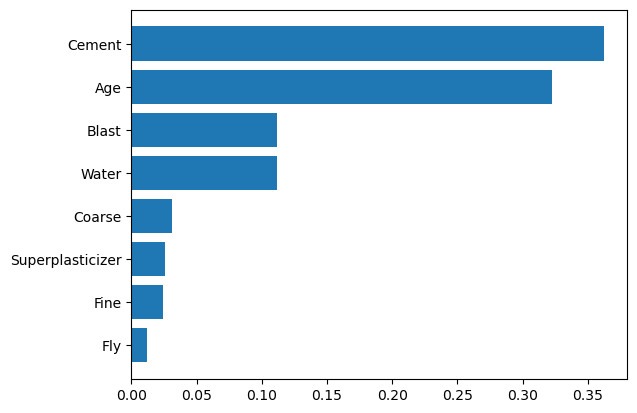

In [311]:
plt.barh(df_tree['features'], df_tree['importances'])

In [285]:
best_tree.feature_importances_

array([0.36212703, 0.11167512, 0.01174962, 0.11159204, 0.02560131,
       0.03088099, 0.02427884, 0.32209506])

## using insurence dataset

In [313]:
ins = pd.read_csv('Cases/Medical Cost Personal/insurance.csv')

In [315]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [359]:
X= ins.drop('charges', axis=1)
y= ins['charges']

In [327]:
lbl = LabelEncoder()

In [361]:
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ohe, make_column_selector(dtype_include = object)), verbose_feature_names_out = False)

In [365]:
dtr = DecisionTreeRegressor()
pipe = Pipeline([('CT', ct), ('DTR', dtr)])
params = {'DTR__min_samples_leaf': [1, 10, 25, 50], 'DTR__min_samples_split': [2, 10, 25, 50], 'DTR__max_depth' : [None,4, 6]}

In [369]:
gcv = GridSearchCV(pipe, param_grid = params, cv = KFold(n_splits = 5, shuffle = True, random_state = 24), error_score='raise')
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D134296EA0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D1341D1430>)],
                                                          verbose_feature_names_out=False)),
                                       ('DTR', DecisionTreeRegressor())]),
             param_grid={'DTR__max_depth': [None, 4, 6],
                         'DTR__min_samples_leaf': [1, 10, 25, 50],
                         'DTR__min_samples_split': [2, 10, 25, 50]})

In [371]:
gcv.best_score_

0.8519043198478519

In [373]:
gcv.best_params_

{'DTR__max_depth': 6,
 'DTR__min_samples_leaf': 50,
 'DTR__min_samples_split': 25}

In [375]:
bb= gcv.best_estimator_

In [387]:
dd = pd.DataFrame({'A' : bb.named_steps['DTR'].feature_importances_, 'B': bb.named_steps['CT'].get_feature_names_out()})

<BarContainer object of 11 artists>

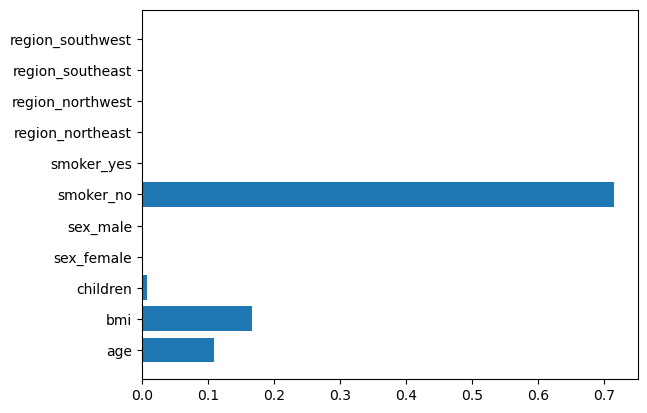

In [391]:
plt.barh(dd['B'], dd['A'])

### using label encoding

In [411]:
ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [413]:
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ord, make_column_selector(dtype_include = object)))

In [415]:
dtr = DecisionTreeRegressor()
pipe = Pipeline([('CT', ct), ('DTR', dtr)])
params = {'DTR__min_samples_leaf': [1, 10, 25, 50], 'DTR__min_samples_split': [2, 10, 25, 50], 'DTR__max_depth' : [None,4, 6]}

In [417]:
gcv = GridSearchCV(pipe, param_grid = params, cv = KFold(n_splits = 5, shuffle = True, random_state = 24), error_score='raise')
gcv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D1347FC890>),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001D1347FCAA0>)])),
                                       ('DTR', DecisionTreeRegressor())]),
             param_grid={'DTR__max_depth': [None, 4, 6],
                         'DTR__min_samples_leaf': [1, 10, 25, 50],
                         'DTR__min_samples_split': [2, 10, 25, 50]})

In [419]:
gcv.best_score_

0.8521883826570489

In [421]:
bbb = gcv.best_estimator_

In [423]:
ddd = pd.DataFrame({'A' : bbb.named_steps['DTR'].feature_importances_, 'B': bbb.named_steps['CT'].get_feature_names_out()})

<BarContainer object of 6 artists>

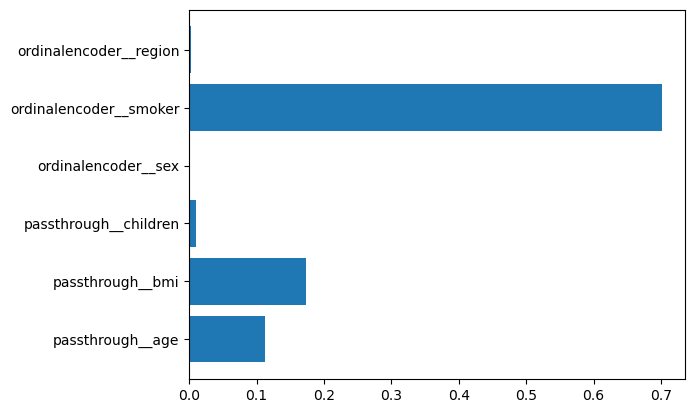

In [427]:
plt.barh(ddd['B'], ddd['A'])

# kaggle Competition

In [530]:
tst = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Downloads\\playground-series-s3e25\\test.csv", index_col = 0)
trn = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Downloads\\playground-series-s3e25\\train.csv",index_col = 0)
sample = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Downloads\\playground-series-s3e25\\sample_submission.csv")

In [534]:
X = trn.drop('Hardness', axis = 1)
y = trn['Hardness']

In [547]:
dtr = DecisionTreeRegressor()
params = {
    'min_samples_split': [2, 5, 10, 20, 50],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10, 20, 50],         # Minimum samples required at a leaf node
    'max_depth': [None, 5, 10, 15, 20, 30],         # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 'log2', None], # Number of features to consider for the best split
    'max_leaf_nodes': [None, 10, 20, 50, 100],      # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2], # Threshold for early stopping in tree growth
    'ccp_alpha': [0.0, 0.01, 0.1, 0.001]            # Complexity parameter for minimal cost-complexity pruning
}



In [ ]:
best_tree = gcv.best_estimator_
sample.iloc[:, 1] = best_tree.predict(tst

In [ ]:
sample.to_csv('submisssion.csv', index = False)